IMT 2200 - Introducción a Ciencia de Datos<br>
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2025-S2**<br>
**Profesor:** Rodrigo A. Carrasco <br>

---

## Proyecto de Investigación – Terremotos en Chile





## Pregunta 3:
## **Analizar los terremotos acontecidos en el país y obtener las regiones y ciudades de mayores riesgos, permitiendo calcular el área de mayor riesgo en el país**<br> 


Para esta pregunta trabajaremos con las columnas de magnitud, latitud, longitud y region

In [45]:
import pandas as pd
from pathlib import Path
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px

In [46]:
ruta = Path('..') / 'data' / 'query_limpio.csv'
df = pd.read_csv(ruta)

In [47]:
df_regiones = df[["mag", "latitude", "longitude", "region"]]
df_regiones

,mag,latitude,longitude,region
0,4.60,-30.6105,-71.2446,Coquimbo
1,4.60,-18.9492,-69.4232,Tarapacá
2,4.70,-21.7142,-68.4897,Antofagasta
3,5.00,-19.3888,-69.2674,Tarapacá
4,4.70,-32.5045,-71.5221,Valparaíso
...,...,...,...,...
8972,6.35,-32.1750,-71.7630,Valparaíso
8973,6.74,-39.2280,-72.7210,Araucanía
8974,8.20,-32.4000,-71.4000,Valparaíso
8975,6.72,-32.3120,-73.7060,Valparaíso


In [48]:
df_regiones_clean = df_regiones.dropna()
df_regiones_clean = df_regiones_clean.drop_duplicates(keep='first')
print("Cantidad total de nulos en df:", df_regiones_clean.isnull().sum().sum())
print("Cantidad total de duplicados en df:", df_regiones_clean.duplicated().sum())

Cantidad total de nulos en df: 0
Cantidad total de duplicados en df: 0


In [49]:
df_regiones_clean["mag"].describe()

count    8976.000000
mean        4.929510
std         0.500338
min         4.500000
25%         4.600000
50%         4.800000
75%         5.100000
max         9.500000
Name: mag, dtype: float64

Podemos observar que no hay datos nulos ni duplicados y que los valores de magnitud son razonables. Podemos confirmar que tenemos lo necesario para continuar

Partamos creando GeoDatafram que nos permitirá graficar un mapa con todos los terremotos a lo largo del país

In [50]:
gdf = gpd.GeoDataFrame(
    df_regiones_clean, geometry=gpd.points_from_xy(df_regiones_clean["longitude"], df_regiones_clean
    ["latitude"]), crs="EPSG:4326")

direccion = Path('..') / 'data' / 'Regiones' / 'Regional.shp'
regional = gpd.read_file(direccion) #abrimos el documento regional.shp

regional_corrected = regional.set_crs("EPSG:3857", allow_override=True)
# convertimos el crs a epsg:4326
regional_wgs84 = regional_corrected.to_crs("EPSG:4326")

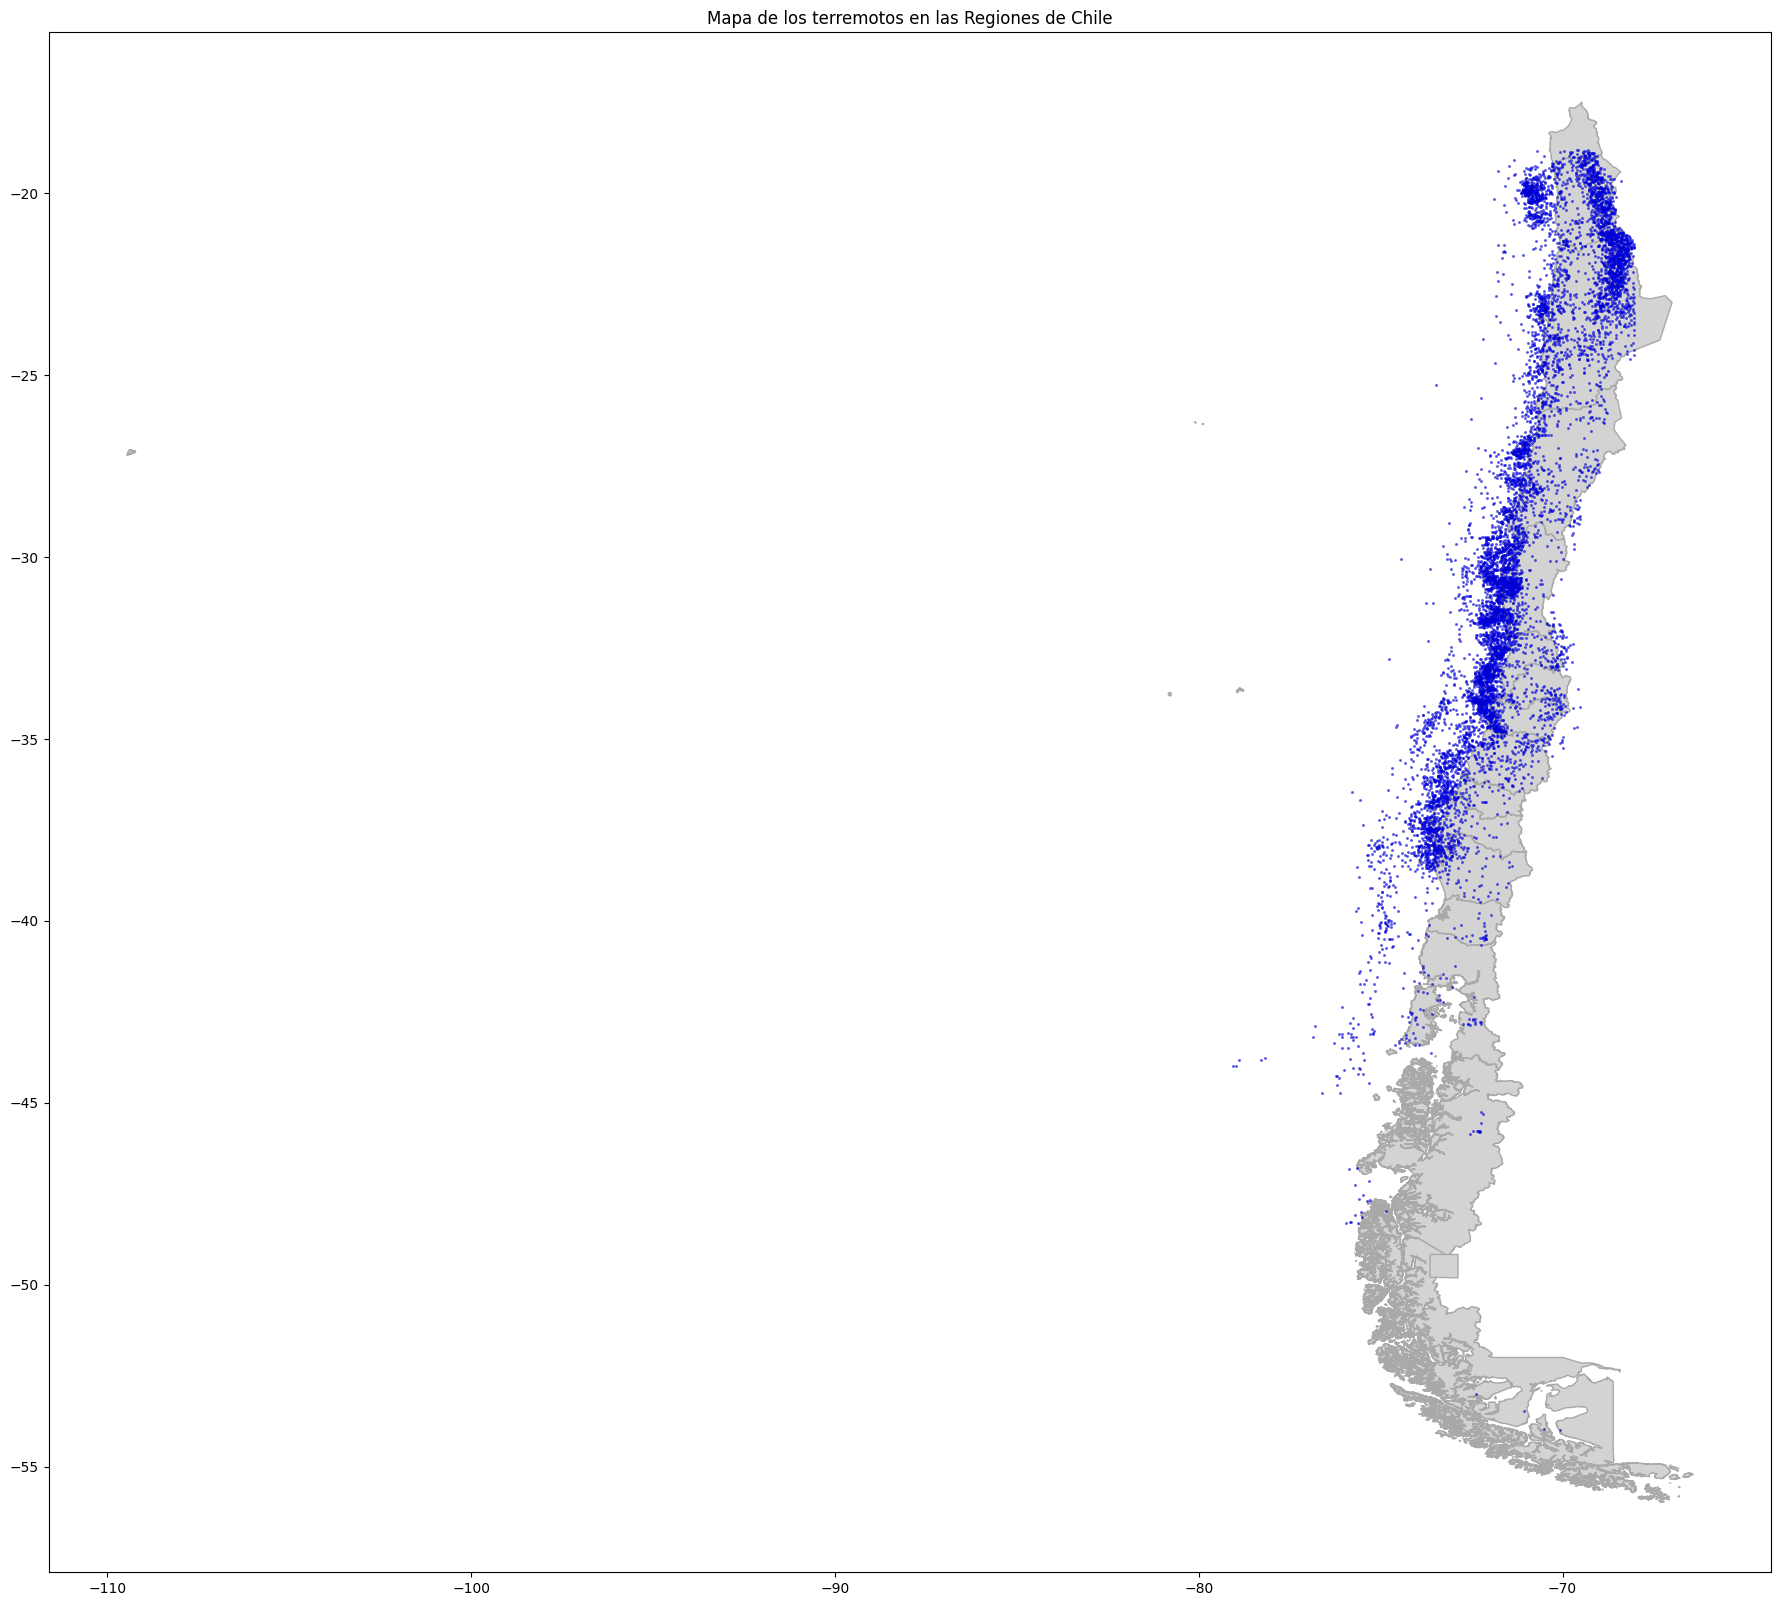

In [51]:
fig, ax = plt.subplots(figsize=(30, 20))
regional_wgs84.plot(ax=ax, color='lightgray', edgecolor="darkgray")
gdf.plot(ax=ax, color='blue', markersize=3, alpha=0.7, edgecolor='darkblue', lw=0.2)
ax.set_aspect('equal')
ax.set_title('Mapa de los terremotos en las Regiones de Chile')
plt.show()

In [70]:
df_regiones_clean

,mag,latitude,longitude,region
0,4.60,-30.6105,-71.2446,Coquimbo
1,4.60,-18.9492,-69.4232,Tarapacá
2,4.70,-21.7142,-68.4897,Antofagasta
3,5.00,-19.3888,-69.2674,Tarapacá
4,4.70,-32.5045,-71.5221,Valparaíso
...,...,...,...,...
8972,6.35,-32.1750,-71.7630,Valparaíso
8973,6.74,-39.2280,-72.7210,Araucanía
8974,8.20,-32.4000,-71.4000,Valparaíso
8975,6.72,-32.3120,-73.7060,Valparaíso


In [ ]:
fig = px.scatter_geo(data_frame=df_regiones_clean,
                    lat='latitude',
                    lon='longitude',
                    color='mag',
                    hover_name='mag',
                    projection="natural earth",
                    color_continuous_scale=px.colors.sequential.Inferno_r,
                    title="Distrubucion de terremotos en el país",
                )

fig.update_layout(
    margin={"r":0,"t":50,"l":0,"b":0}, # Márgenes del gráfico
    height=600, # Altura del gráfico
    width=800, # Ancho del gráfico
)
fig.update_traces(
    marker=dict(size=10), # Tamaño de los puntos
)
fig.show()

Acá en este mapa interactivo podemos también observar la distribución a lo largo del país y la escala

In [81]:
import folium
import webbrowser
import os

# Tu código del mapa
m = folium.Map(location=[-20.22, -70.15], zoom_start=10)

# Añadir puntos
for idx, row in df_regiones_clean.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(m)

# Guardar y abrir automáticamente
file_path = Path('..') / 'data' / 'mapa_chile.html'
m.save(file_path)

# Abrir en el navegador predeterminado
webbrowser.open('file://' + os.path.abspath(file_path))

True

Con este código también podemos ver un mapa más especifico del país.

Podemos observar que hay mayor presencia a lo largo de toda la zona costera del país, principalmente en la zona centro norte del país.

In [52]:
#ahora vamos a filtrar por regiones para poder observar el comportamiento
df_regiones = df_regiones_clean.copy()
df_regiones = df_regiones_clean.groupby('region').size().reset_index(name='counts') 
df_regiones.head(16)

,region,counts
0,Antofagasta,1910
1,Araucanía,172
2,Arica y Parinacota,127
3,Atacama,825
4,Aysén,27
5,Biobío,809
6,Coquimbo,1614
7,Libertador General Bernardo O'Higgins,294
8,Los Lagos,147
9,Los Ríos,89


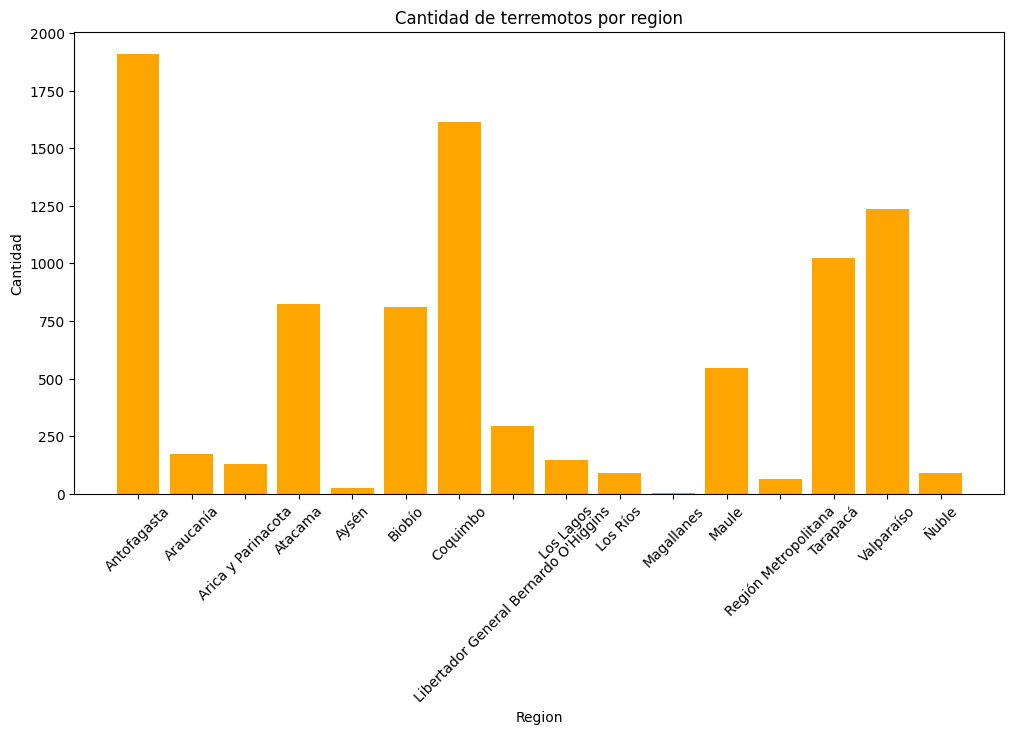

In [53]:
plt.figure(figsize=(12, 6))
plt.bar(df_regiones.region, df_regiones.counts, color = "orange")
plt.title('Cantidad de terremotos por region')
plt.xlabel('Region')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

En base al gráfico observamos que las regiones de Antofagasta, Arica y Parinacota, Biobío, Coquimbo, Metropolitana, Tarapacá y Valparaíso son las regiones más afectadas en el país

In [54]:
#Ahora queremos filtrar por ciudades
df_ciudades = df.copy()
df_ciudades = df_ciudades.groupby('zone').size().reset_index(name='counts') 
df_ciudades.head()

,zone,counts
0,Ancud,31
1,Angol,22
2,Antofagasta,418
3,Arauco,58
4,Arica,127


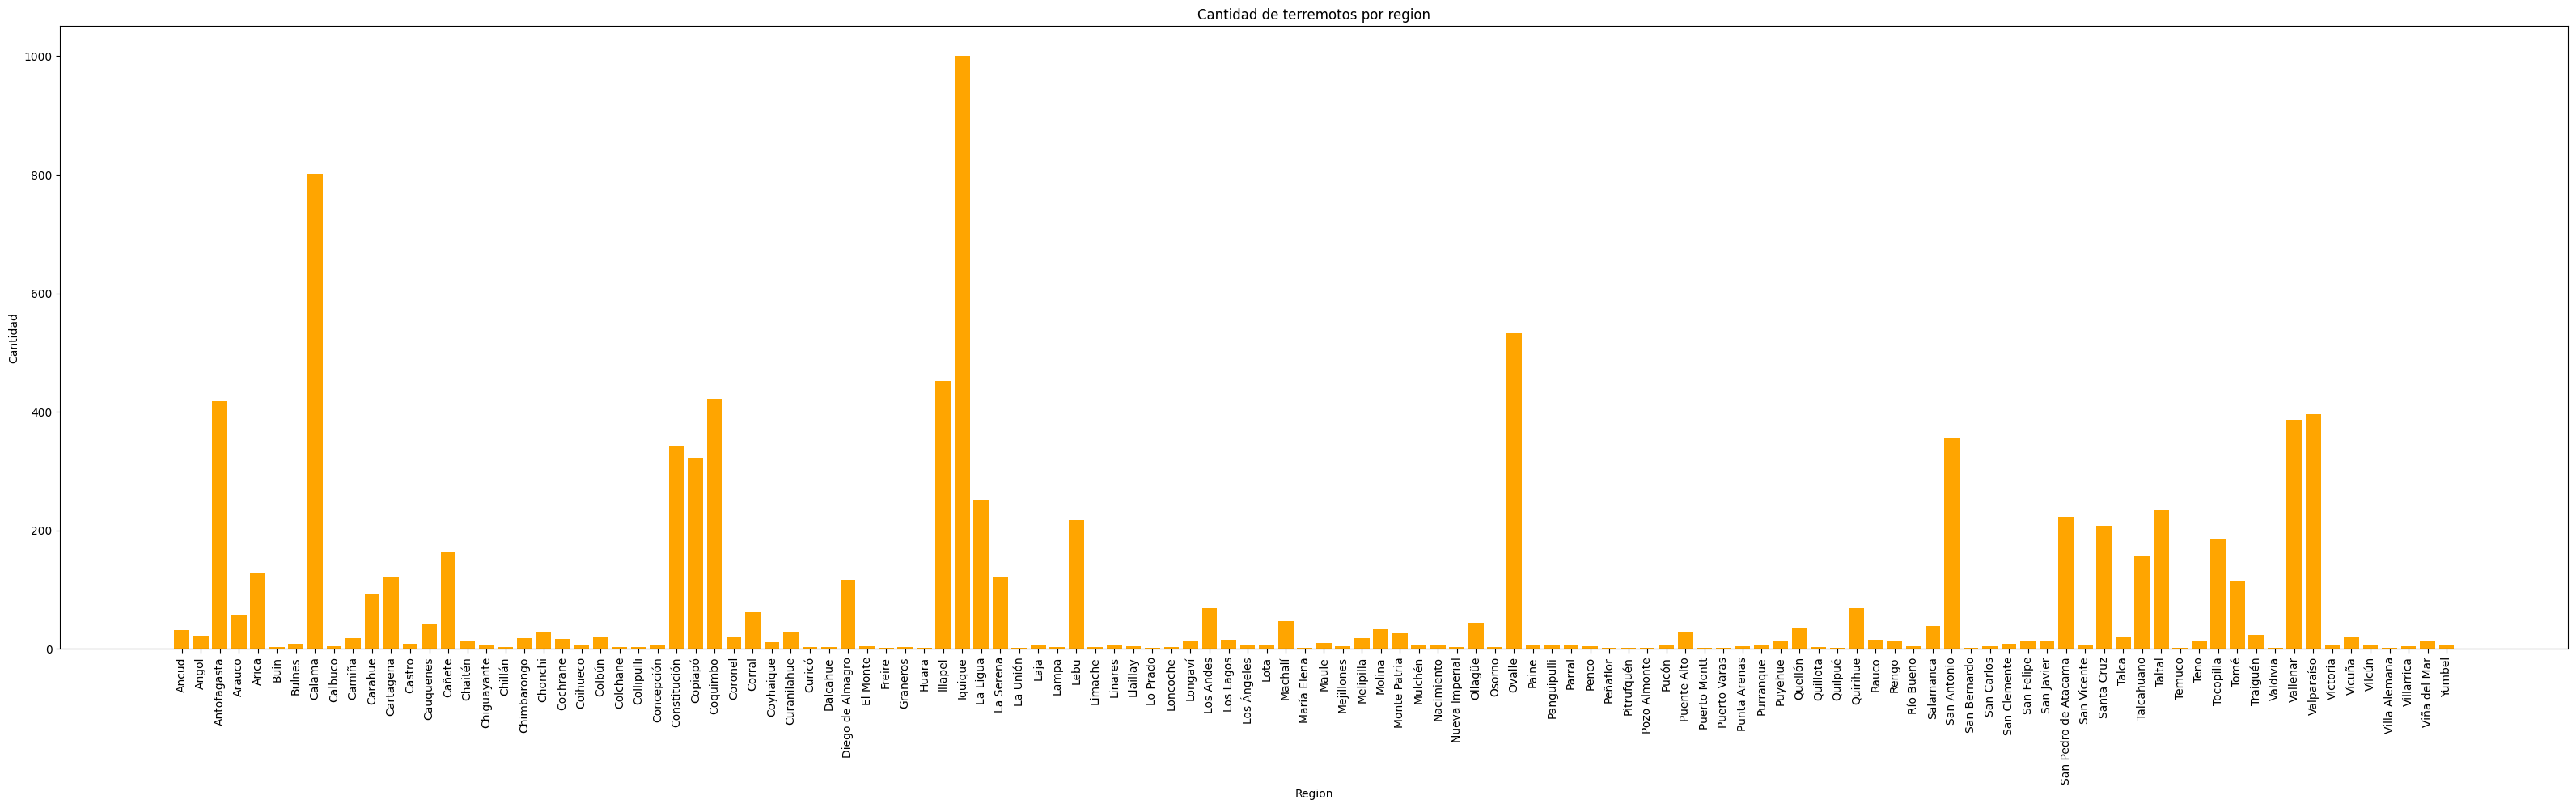

In [55]:
plt.figure(figsize=(40, 10))
plt.bar(df_ciudades.zone, df_ciudades.counts, color = "orange")
plt.title('Cantidad de terremotos por region')
plt.xlabel('Region')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.show()

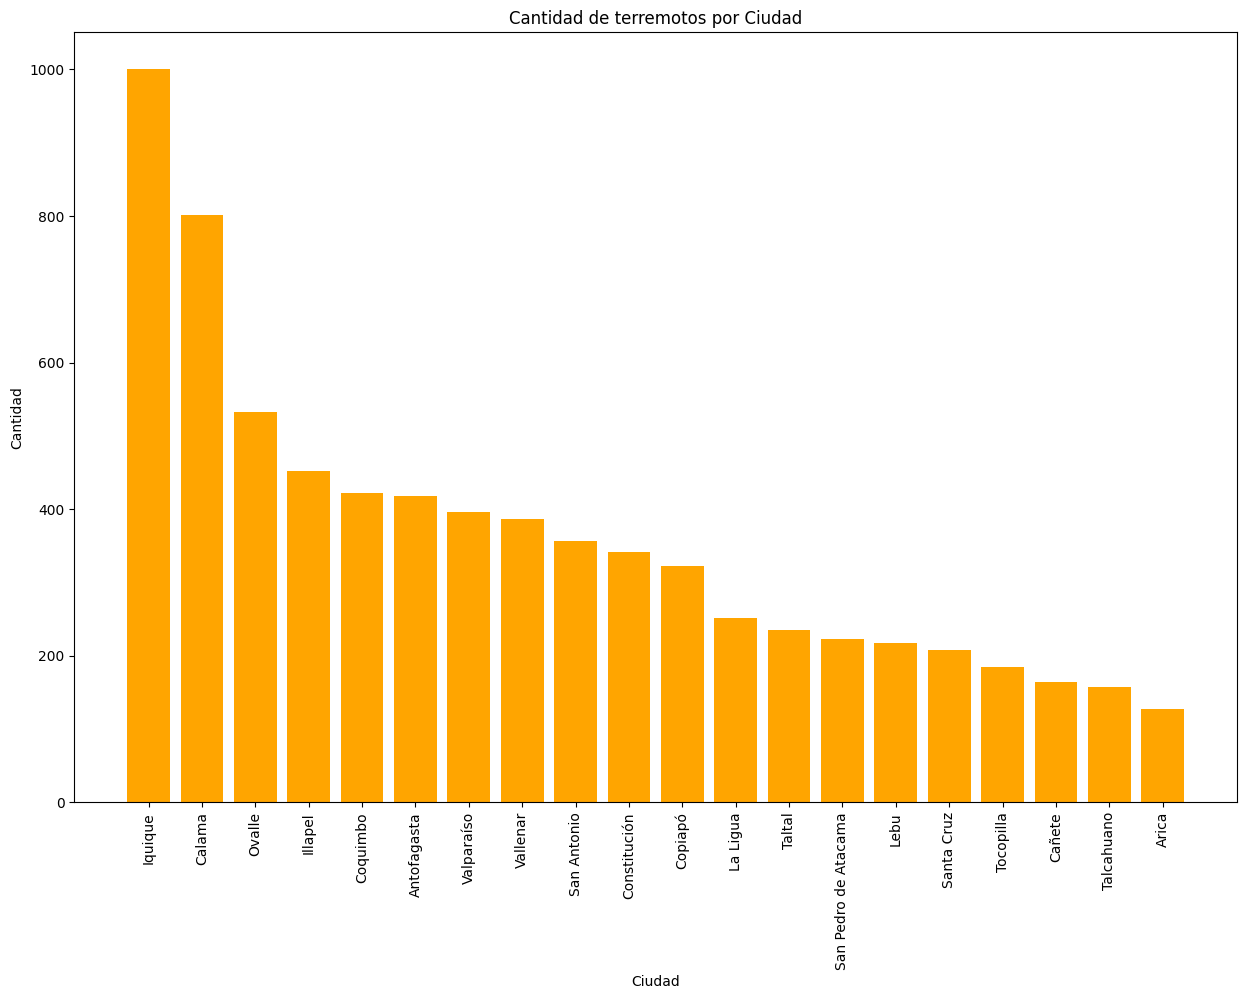

In [56]:
df_ciudades = df_ciudades.sort_values("counts", ascending=False)
plt.figure(figsize=(15, 10))
plt.bar(df_ciudades[:20].zone, df_ciudades[:20].counts, color = "orange")
plt.title('Cantidad de terremotos por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.show()

Podemos observar las 20 ciudades más afectadas del país, siendo Iquique la más afectada.

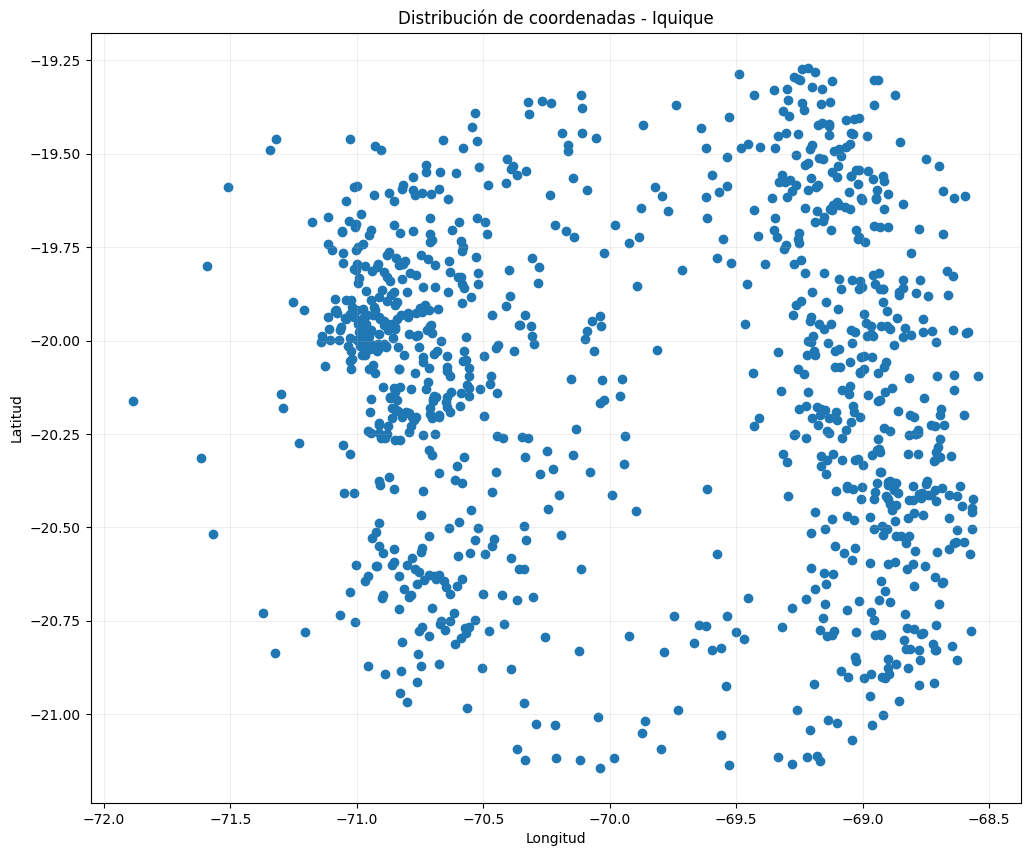

In [57]:
iquique = df.copy()
iquique = iquique[iquique["zone"] == "Iquique"]
iquique = iquique[['longitude', 'latitude']]

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
ax.scatter(iquique['longitude'], iquique['latitude'])
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Distribución de coordenadas - Iquique')
plt.grid(True, alpha=0.2)
plt.show()

Con estos datos tenemos la informacion necesaria para responder a nuestra pregunta

In [80]:
import folium
import webbrowser
import os

m = folium.Map(location=[-20.22, -70.15], zoom_start=10)

for idx, row in iquique.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(m)

file_path = Path('..') / 'data' / 'mapa_iquique.html'
m.save(file_path)

webbrowser.open('file://' + os.path.abspath(file_path))

True

Si corren este código pueden visualizar un mapa interactivo que nos permite ver las zonas más afectadas.

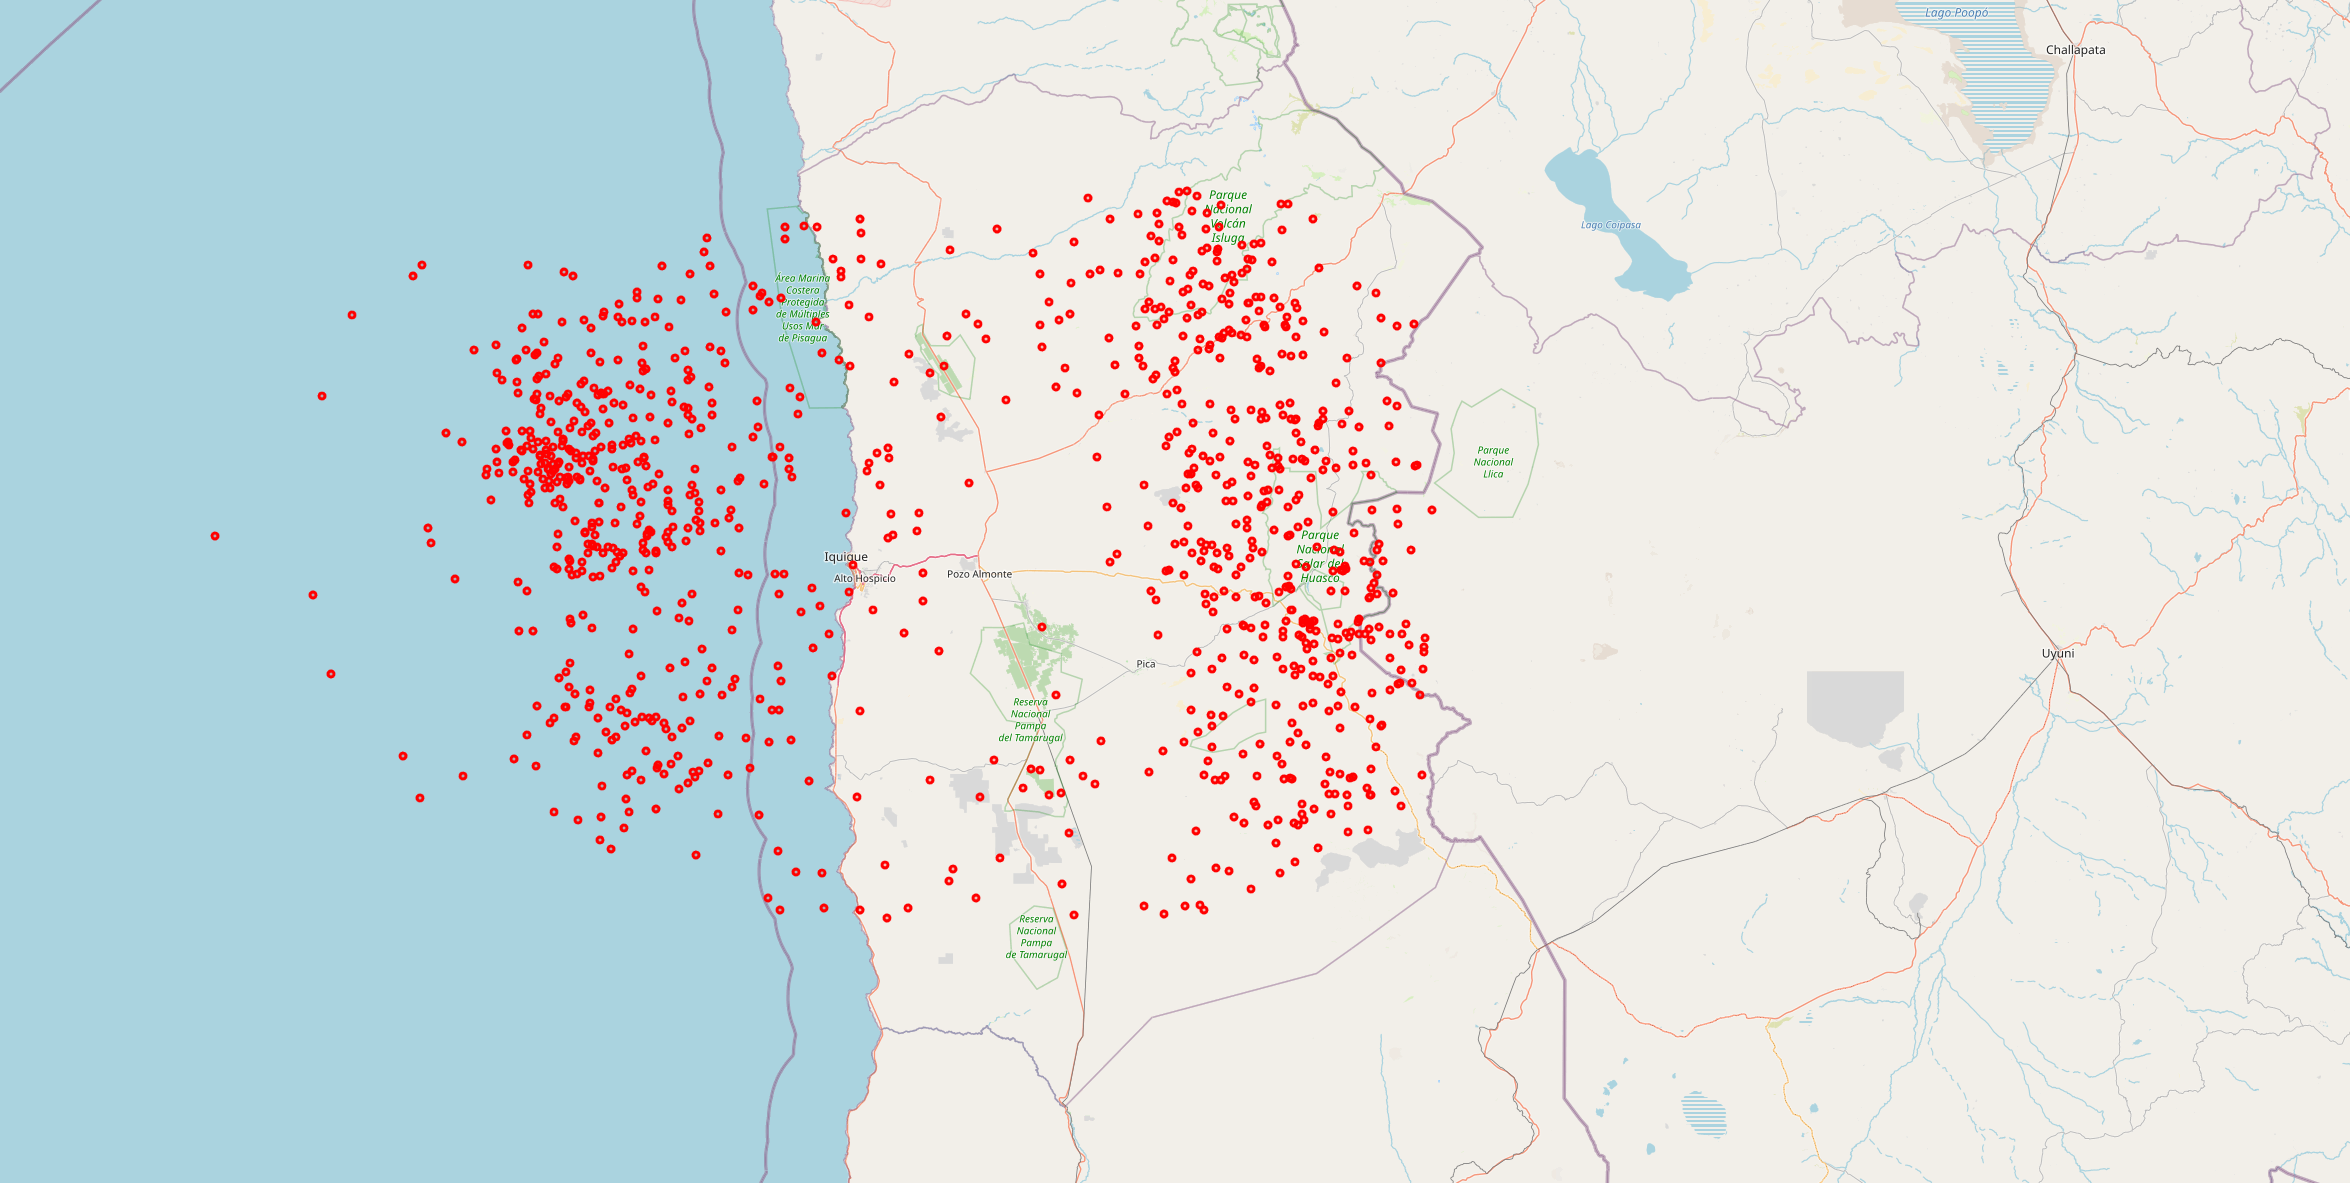

Tambien podemos obeservar este mapa interactivo

In [69]:
iquique = df.copy()
iquique = iquique[iquique["zone"] == "Iquique"]

fig = px.scatter_geo(data_frame=iquique,
                    lat='latitude',
                    lon='longitude',
                    color='mag',
                    hover_name='mag',
                    projection="natural earth",
                    color_continuous_scale=px.colors.sequential.Inferno_r,
                    title="Distrubucion de terremotos en la ciudad de Iquique",
                    hover_data={
                        "depth": True,
                        "magType": True,
                        "date": True,
                        "hour": True
                    },
                )

fig.update_layout(
    margin={"r":0,"t":50,"l":0,"b":0}, # Márgenes del gráfico
    height=600, # Altura del gráfico
    width=800, # Ancho del gráfico
)
fig.update_traces(
    marker=dict(size=10), # Tamaño de los puntos
)
fig.show()